# DSC 295: Data Science for Cybersecurity
***
### _Project Topic_: Classifying URL's as Malware or Benign
### _Date_: 04/20/2023
### _Name_: Srinivas Ganesan
----------------------------------------------------------------------------------------------------------------------                          


### I. Problem Statement:
**Topic**: Classifying URL's as Malicious or Benign using Logistic Regression.

**Relevance**: In this modern world where the internet is the most popular means of obtaining information, cyber crimes occuring through malcious URL's are becoming very frequent. Malicious URL's are used to steal information such as Bank passwords, private photos and videos, and several other sensititve data. Using ML algortihms we can solve this cybersecurity issue by classifying URL's into Malicious and Benign websites so that users are aware of the dangerous key words to look out for when opening URL's.

**Initial prediction**: Logistic Regression is a popular machine learning algorithm that has been widely used for binary classification tasks(eg. Malicious = 1, Benign =0). Based on the specific qualities of my dataset, which are -  Number of features, Size of my dataset and Degree of sparsity of each feature of my dataset, I predict that the  Logistic Regression can classify the URL's with a accuaracy greate than 95%.

*Additional Note*: Originally, my problem statement was - 'Classifying URL's as Malicious or Benign using SVM algorithm'. But, the SVM algorithm is unable to classify the URL's in my particular dataset for reasons that I will state at the end of my project documentation.

In [48]:
#import the necessary libraries
#plotting
import matplotlib.pyplot as plt
#pandas
import pandas as pd
#wordcloud
from wordcloud import WordCloud
#sklearn for accessing ML operations and Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import os
#confusion matrix module
from sklearn.metrics import confusion_matrix
#Importing dependencies for Data visualization
from urllib.parse import urlparse
from tld import get_tld
import os.path

### II. Dataset:
**Question**: Is there an existing dataset? If so, how is it useful for your problem? Can anything be removed? Why?

- For my project, I have decided to use an existing dataset which can be accessed through the follwing link:https://www.kaggle.com/datasets/sid321axn/malicious-urls-dataset?resource=download

- I chose this particular data set for the following reasons:

    1. In order to use Logistic regression to classify URL's, first we need to separate each URL into tokens. Since URL's are very complex pieces of text, they contain several unique tokens(or features). To train our Logistic regression model on such complext data, we need a huge dataset. The above dataset that I have sourced from Kaggle is a huge dataset of 651,191 URLs. Therefore, it is ideal for the purposes of my project.
    
    2. Additionally, the above dataset consists of a column for 'type' of each URL. Since I'm using a supervised ML algorithm to classify URL's, the 'type' column of my dataset is essential for my project in order train my Logistic Regression model(in other words, estimate the hyperparameters of my model). 

- I have modified my dataset in the following ways:

    1. My dataset labels the URL's into 4 broad categories - 'Malware', 'Defacement', 'Phishing', and 'Benign'. Since the purpose of my project is classify URL's into only two categories(Malicious and Benign), I modified my dataset by renaming the labels -  'Malware', 'Defacement' and 'Phishing' as 'Malicious'. This was necessary for my project because the Logistic regression algorithm can only classify data into two categories. 
    2. In order to visualize all the features of my URL I created specific columns(like url length, suffix length, etc.) where each of these columns contains a corresponding count of the specific column feature(like url length, suffix length, etc.) for each URL link. The addtional set of columns that I added to my dataset are:
        (i)Length Features:
            a) Length Of Url(column title: 'url_length')
            b) Length of Hostname(column title: 'hostname_length')
            c) Length Of Top Level Domain(column title: 'tld_length')
        (ii)Count Features
            a) Count Of '-'(column title: 'count-')
            b) Count Of '@'(column title: 'count@')
            c) Count Of '?'(column title: 'count?')
            d) Count Of '%'(column title: 'count%')
            e) Count Of '.'(column title: 'count.')
            f) Count Of '='(column title: 'count=')
            g) Count Of 'http'(column title: 'count-http')
            h) Count Of 'www'(column title: 'count-www')
            i) Count Of Digits(column title: 'count-digits')
            j) Count Of Letters(column title: 'count-letters')
    
- The following is a detailed explanation of each 'useful' component of my modified dataset:

    1. The 'url' column of my modified dataset contains a sample of 651,191 URL links. This information is useful for my project because, I will be separating each of these URL links into tokens which will then be used by my Logistic regression model to identify common tokens(or features) present in 'Malicious' or 'Benign' URL's.
    
    2. The 'type' column of my modified dataset contains a label - 'Malicious' or 'Benign' corresponding to each of the 651,191 URL links. This information is useful for my project because, using each labelled pair: (URL link, type), I will be able to train my Logistic regression(obtain the appropriate hyperparameters for my model) to predict whether an inputted URL link is either 'Malicious' or 'Benign'.
    
    3. The Length features of my dataset are useful while visualizing the dataset via a Heatmap. The following are definitions of each of the 'Length features':
        a) Length Of Url: Integer count of the number of characters(letter, numbers, etc.) in a given URL link.
        b) Length of Hostname: Integer count of the number of characters(letter, numbers, etc.) in the hostname of a given URL link. For example, 'example' is the hostname of the URL link: 'www.example.com'.
        c) Length Of Top Level Domain: Integer count of the number of characters(letter, numbers, etc.) in the suffix of a given URL. For example, 'com' is the top level domain of the URL link: 'www.example.com'.
        
    4. Similar to Length features, the Count features of my dataset are useful while visualizing the dataset via a Heatmap. The definitions of the count features that I have added to my datatset are self-explanatory.




In [49]:
#Load the data into a pandas dataframe
url_df = pd.read_csv('malicious_phish.csv')
url_df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [50]:
# Modify the dataset such that URL's are categorized into - 'malicious' and 'benign' only.
url_df['type'] = url_df['type'].replace({'phishing':'malicious','defacement':'malicious','malware':'malicious'})

In [51]:
# ADD LENGTH FEATURES OF THE URL TO MY DATAFRAME
#Length of URL
url_df['url_length'] = url_df['url'].apply(lambda i: len(str(i)))
#Hostname Length
url_df['hostname_length'] = url_df['url'].apply(lambda i: len(urlparse(i).netloc))
#Length of Top Level Domain
# Add 'tld' column to extract tld's(we need this information to calculate the length of each tld)
url_df['tld'] = url_df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

url_df['tld_length'] = url_df['tld'].apply(lambda i: tld_length(i))
#Once we have the tld lengths, we drop the 'tld' column('tld' column is not necessary for our purpose)
url_df = url_df.drop("tld",1)
url_df.head()

/var/folders/3z/0886jy4j2nv4lydymg5vwltc0000gn/T/ipykernel_36672/2249980894.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  url_df = url_df.drop("tld",1)


,url,type,url_length,hostname_length,tld_length
0,br-icloud.com.br,malicious,16,0,-1
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,-1
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,-1
3,http://www.garage-pirenne.be/index.php?option=...,malicious,88,21,2
4,http://adventure-nicaragua.net/index.php?optio...,malicious,235,23,3


In [52]:
# ADD COUNT FEATURES OF THE URL TO MY DATAFRAME
# Count the number of '-'
url_df['count-'] = url_df['url'].apply(lambda i: i.count('-'))

url_df['count@'] = url_df['url'].apply(lambda i: i.count('@'))
url_df['count?'] = url_df['url'].apply(lambda i: i.count('?'))
url_df['count%'] = url_df['url'].apply(lambda i: i.count('%'))
url_df['count.'] = url_df['url'].apply(lambda i: i.count('.'))
url_df['count='] = url_df['url'].apply(lambda i: i.count('='))
url_df['count-http'] = url_df['url'].apply(lambda i : i.count('http'))
url_df['count-www'] = url_df['url'].apply(lambda i: i.count('www'))
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
url_df['count-digits']= url_df['url'].apply(lambda i: digit_count(i))
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
url_df['count-letters']= url_df['url'].apply(lambda i: letter_count(i))
url_df.head()

,url,type,url_length,hostname_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-www,count-digits,count-letters
0,br-icloud.com.br,malicious,16,0,-1,1,0,0,0,2,0,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,-1,0,0,0,0,2,0,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,-1,0,0,0,0,2,0,0,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,malicious,88,21,2,1,0,1,0,3,4,1,1,7,63
4,http://adventure-nicaragua.net/index.php?optio...,malicious,235,23,3,1,0,1,0,2,3,1,0,22,199


In [53]:
# Output that shows the number of URL's collected in the dataset
url_df.shape

(651191, 15)

### 3. Detailed Analysis:
**Questions:** How can we analyze the data? Are you using a machine learning model? Which one? Why? Are you using a handcrafted algorithm? What parts did you create/modify? References? Explain your approach and how the “innards” work. Provide any references you used. Explain why you chose this approach

- In order to analyze my dataset, I used two data visualization techniques: Correlation Heatmap and Word Cloud. I used these two data visualization techniques in the following manner:

    a) As I stated earlier, I modified my dataset to include columns containing important features of each URL link(Length features and Count features as stated before). Using these columns I created a heatmap that quantifies the correlation(an integer value between 0(low correlation) and 1(high correlation)) between each of these features. This information is very useful to us because, if we are able to identify that a particular feature of a URL link, like the 'top level domain length', is very critical in classifying a URL as either 'Malicious' or 'Benign', then we can use the Correlation heatmap to identify other features that might be very critical in classifying a URL due to high correlation with 'top level domain length' such as 'count of digits in the url', 'count of http in a URL', etc.
    
    b)I also created a Word cloud of the most commomnly used suffixes(top level domains) in 'Malicious' and 'Benign' URL's. This visualization is useful in understanding the importance of the 'tld' feature in classifying URL's as either 'Malicious' or 'Benign'.
    
- For my project, I'm using the Logistic Regression ML algorithm. This is because of the following reasons that I have stated earlier:

    1. My project aims to use ML to solve a Binary classification problem. This is an ideal use case for Logistic Regression, where the algorithm learns a set of weights for each feature, which are used to compute a probability score between 0 and 1 for each class, and the class with the highest probability score is chosen as the predicted label. 
    
    2. In addition, since my project aims to classify URL's, which are a complex text with a high magnitude of tokens(or features), Logistic regression performs much better in this scenario compared to other ML algorithms.
    
- For the sake of simplicity of my project I will be using the 'LogisticRegression' module from the sklearn.linear_model library in python. The code for the Logistic regression algorithm part of my project is sourced from Week 7 lecture notes of DSC 295: Cybersecurity course at NCSU.


- The following are the steps that I used to implement my problem statement:

    **Step 1**: Since the Logistic regression algorithm only requires this paired datapoint: (URL link, type), I will be creating two data structures 'url_list', 'y' to store the URL links and their appropriate labels, respectively. 
    
    **Step 2**: Create a fuction called 'makeTokens' that extracts tokens from URLs by splitting them into segments separated by slashes, dashes, and dots.
    
    **Step 3**: Use the TfidfVectorizer class from Scikit-learn is used to convert the list of URLs into a matrix consisisting of elements that denote the 'weights' assigned to each token.
    
    **Step 4**: Use the above matrix to train an Logistic regression model using the 'LogisticRegression' module.

/var/folders/3z/0886jy4j2nv4lydymg5vwltc0000gn/T/ipykernel_36672/3355209338.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(url_df.corr());


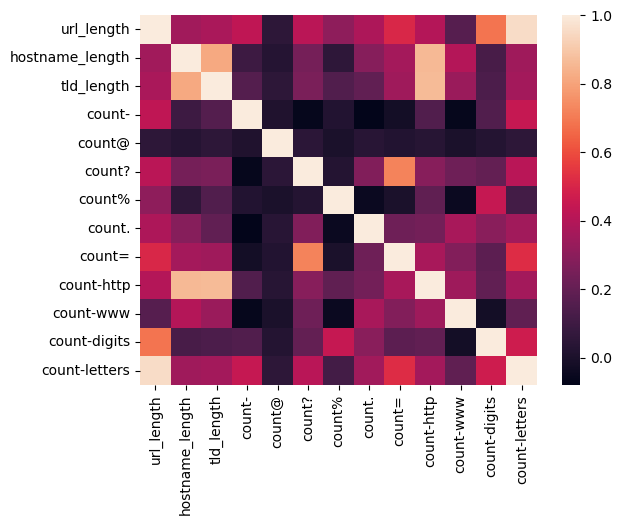

In [54]:
# Dataset visualization using a Correlation Heatmap
# 1 means highest corellation between two features, and 0 means lowest corellation between two features.
#Referenced from https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
sns.heatmap(url_df.corr());


In [55]:
# Store the URL's and their Types in two different lists
url_list = url_df["url"]
y = url_df["type"]

In [56]:
# Create a dataframe with two columns: Suffix, Count(for Malicious)
# count the number of occurences of 12 most common suffixes:'.com','.org','.be','.net','.co','.nl','.hu','.ca','.edu','.gr','.pl','.de'
count = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,url_df.shape[0]):
    if (y[i]=='malicious')and('.com' in url_list[i]):
        count[0] +=1
    elif (y[i]=='malicious')and('.org' in url_list[i]):
        count[1] +=1
    elif (y[i]=='malicious')and('.be' in url_list[i]):
        count[2] +=1
    elif (y[i]=='malicious')and('.net' in url_list[i]):
        count[3] +=1
    elif (y[i]=='malicious')and('.co' in url_list[i]):
        count[4] +=1
    elif (y[i]=='malicious')and('.nl' in url_list[i]):
        count[5] +=1
    elif (y[i]=='malicious')and('.hu' in url_list[i]):
        count[6] +=1
    elif (y[i]=='malicious')and('.ca' in url_list[i]):
        count[7] +=1
    elif (y[i]=='malicious')and('.edu' in url_list[i]):
        count[8] +=1
    elif (y[i]=='malicious')and('.gr' in url_list[i]):
        count[9] +=1
    elif (y[i]=='malicious')and('.pl' in url_list[i]):
        count[10] +=1
    elif (y[i]=='malicious')and('.de' in url_list[i]):
        count[11] +=1
        
mal_data = {'Suffix':['.com','.org','.be','.net','.co','.nl','.hu','.ca','.edu','.gr','.pl','.de'],'Count':[count[0],count[1],count[2],count[3],count[4],count[5],count[6],count[7],count[8],count[9],count[10],count[11]]}
mal_count = pd.DataFrame(mal_data)
mal_count.head()
        
        

,Suffix,Count
0,.com,104838
1,.org,14576
2,.be,2050
3,.net,9692
4,.co,8181


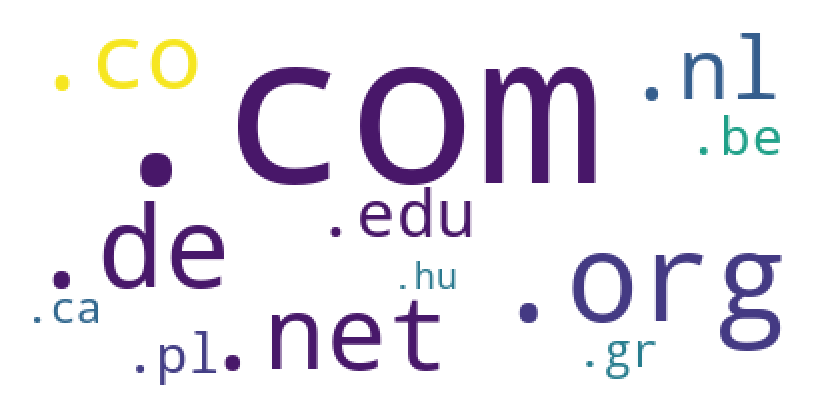

In [57]:
#Reference from WEEK 6 lecture notes
# Convert the DataFrame to a dictionary
suffix_dict = dict(zip(mal_count.Suffix, mal_count.Count))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white")

# Generate the word cloud
wordcloud.generate_from_frequencies(suffix_dict)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [58]:
# Create a dataframe with two columns: Suffix, Count(for Benign)
# count the number of occurences of 12 most common suffixes:'.com','.it','.be','.net','.com','.nl','.hu','.ca','.edu','.gr','.pl','.de'
count1 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,url_df.shape[0]):
    if (y[i]=='benign')and('.com' in url_list[i]):
        count1[0] +=1
    elif (y[i]=='benign')and('.it' in url_list[i]):
        count1[1] +=1
    elif (y[i]=='benign')and('.be' in url_list[i]):
        count1[2] +=1
    elif (y[i]=='benign')and('.org' in url_list[i]):
        count1[3] +=1
    elif (y[i]=='benign')and('.de' in url_list[i]):
        count1[4] +=1
    elif (y[i]=='benign')and('.nl' in url_list[i]):
        count1[5] +=1
    elif (y[i]=='benign')and('.hu' in url_list[i]):
        count1[6] +=1
    elif (y[i]=='benign')and('.ca' in url_list[i]):
        count1[7] +=1
    elif (y[i]=='benign')and('.ir' in url_list[i]):
        count1[8] +=1
    elif (y[i]=='benign')and('.gr' in url_list[i]):
        count1[9] +=1
    elif (y[i]=='benign')and('.pl' in url_list[i]):
        count1[10] +=1
    elif (y[i]=='benign')and('.info' in url_list[i]):
        count1[11] +=1
        
safe_data = {'Suffix':['.com','.it','.be','.org','.de','.nl','.hu','.ca','.ir','.gr','.pl','.info'],'Count':[count1[0],count1[1],count1[2],count1[3],count1[4],count1[5],count1[6],count1[7],count1[8],count1[9],count1[10],count1[11]]}
safe_count = pd.DataFrame(safe_data)
safe_count.head()

,Suffix,Count
0,.com,318538
1,.it,1008
2,.be,592
3,.org,37790
4,.de,1573


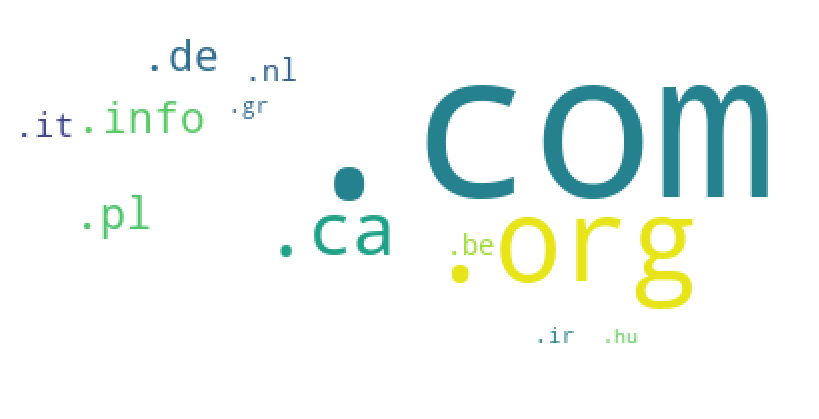

In [59]:
# Convert the DataFrame to a dictionary
suffix1_dict = dict(zip(safe_count.Suffix, safe_count.Count))

# Create a WordCloud object
wordcloud1 = WordCloud(background_color="white")

# Generate the word cloud
wordcloud1.generate_from_frequencies(suffix1_dict)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [60]:
#Referenced from Week 6 Lecture notes
# tokenization by hand [1]
def makeTokens(f):
    tkns_By_Slash=str(f.encode('utf-8')).split('/') #Splitting by slash
    total_Tokens=[]
    for i in tkns_By_Slash:
        tokens=str(i).split('-') #Splitting by dash
        tkns_By_Dot=[]
        for j in range(0,len(tokens)):
            temp_Tokens=str(tokens[j]).split('.')
            tkns_By_Dot=tkns_By_Dot+temp_Tokens
        total_Tokens=total_Tokens+tokens+tkns_By_Dot
    total_Tokens=list(set(total_Tokens)) #Removing redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com') #Removing .com since it doesn't provide any information
    return total_Tokens


In [61]:
# TfidfVectorizer considers overall document 'weightage' of a word, it helps deal with most frequent words
vectorizer = TfidfVectorizer(tokenizer = makeTokens)
X = vectorizer.fit_transform(url_list)
#Split my dataset into testing(20%) and training(80%) data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
print(X_train.shape)
print(X_test.shape)
#print the contents of X_train
print(X_train)

/Users/srini_x62/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(520952, 1097287)
(130239, 1097287)
  (0, 752084)	0.4048588878498517
  (0, 33529)	0.4048588878498517
  (0, 186084)	0.4048588878498517
  (0, 414229)	0.3843653261453374
  (0, 186080)	0.3495172598568061
  (0, 414230)	0.3843653261453374
  (0, 603774)	0.23510890558321076
  (0, 967414)	0.18803170604707894
  (1, 354347)	0.7008331582134283
  (1, 354346)	0.7008331582134283
  (1, 8533)	0.13291263558136104
  (2, 338707)	0.4287235684768168
  (2, 799779)	0.4287235684768168
  (2, 799778)	0.4287235684768168
  (2, 338708)	0.4287235684768168
  (2, 803534)	0.35993122378307724
  (2, 199892)	0.26007005707626263
  (2, 189821)	0.20575344675142615
  (2, 605723)	0.15894340514249244
  (3, 42728)	0.5016937354052624
  (3, 386566)	0.40915710683760026
  (3, 1089234)	0.34847346703913434
  (3, 386504)	0.2638614340355638
  (3, 647846)	0.41065272662748736
  (3, 745937)	0.4063374392165978
  :	:
  (520948, 350828)	0.2455235821627548
  (520948, 350829)	0.2455235821627548
  (520948, 684175)	0.3028049718187152
  (520948, 5

In [62]:
# Train the Logistic regression model
# LBFGS is an optimization algorithm to help make training more efficient
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
print("Accuracy ",model.score(X_test, y_test))

Accuracy  0.9759058346578214


In [63]:
model_predictions = model.predict(X_test)
print(confusion_matrix(y_test,model_predictions))

[[84723   944]
 [ 2194 42378]]


### 4. Visualization:
**Questions:** How can the results be visualized? Confusion matrix? Plots? Etc.
How can the visual help us address the problem? Does it reflect what you expected? Clear relationship shown? No relationship shown? Accurate predictions by the model? Etc

- In order to visualize the results of the Logistic Regression Model, I created a confusion matrix to show the accuracy of the Logistic regression model in classifying URL's in the testing dataset. Since my project classifies data into only 2 categories - 'Malicious', and 'Benign', the confusion matrix is a 2x2 matrix.

- From the confusion matrix, we can observe that out of the 130,239 URL's in the testing data, 127,037 URL's have been correctly classified, and 3202 URL's have been misclassified by the Logistic regression model. This result clearly shows that the Logistic regression model is very accurate in classifying URL's.

- Our initial prediction was that Logistic regression will have an accuracy of greater than 95% in classifying the URL's. This is proven to be correct by our confusion matrix, and verified by the Logistic regression score(97.54%).

### 5. Insights
**Questions**: What are three insights gained from the results? Did everything go as expected? Explain.

- The following are the three insights I gained from the results:
    1. Logistic regression is highly accurate in classifying URL's into binary classes.
    2. I also realized that confusion matrix is a very consise visual representation of the accuracy of an ML algorithm.
    3. In addition, I realized from my Word Cloud(data visualization) that certain URL suffixes like: '.de', '.net', '.be', '.gr', '.pl', '.co' are more commonly present in Malicious URL's compared to Benign URL's.
    
- In my project, the following did not go as expected:
    1. I was unable to use the SVM algorithm to classify URL's(as originally stated in my problem statement). The exact reason for this was unclear to me, but, there could be several possible reasons for this like:
        a) My dataset is not linearly separable
        b) Since URL links have a large number of complex tokens(features), SVM is unable to properly classify the URL's.
        
- For the above possible reason, I decided to use Logistic regression to classify my URL's.